# Week 4

## Classification Analysis

Bollinger bands added previously

In [28]:
import numpy as np
import pandas as pd

In [29]:
df = pd.read_csv('HDFC_with_Boll.csv')
df

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,Day_Perc_Change,Trend,Boll_lower,Boll_middle,Boll_upper
0,2017-05-15,HDFC,EQ,1549.80,1554.50,1572.60,1554.10,1561.00,1559.50,1562.62,...,59917,955875,75.25,5,2017,0.000000,Slight or no change,NaN,NaN,NaN
1,2017-05-16,HDFC,EQ,1559.50,1558.00,1569.00,1554.00,1568.00,1566.55,1564.05,...,79354,1652379,78.13,5,2017,0.452068,Slight or no change,NaN,NaN,NaN
2,2017-05-17,HDFC,EQ,1566.55,1565.50,1570.95,1549.75,1550.10,1552.50,1557.08,...,80317,1794472,83.02,5,2017,-0.896875,Slight negative,NaN,NaN,NaN
3,2017-05-18,HDFC,EQ,1552.50,1547.00,1558.60,1526.50,1545.00,1537.05,1539.03,...,85842,1837821,76.44,5,2017,-0.995169,Slight negative,NaN,NaN,NaN
4,2017-05-19,HDFC,EQ,1537.05,1545.00,1548.00,1515.35,1526.50,1520.60,1526.14,...,113875,1601236,74.74,5,2017,-1.070232,Negative,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,2019-05-07,HDFC,EQ,1965.45,1974.80,2009.15,1959.20,1964.50,1966.30,1983.01,...,114029,1522276,56.72,5,2019,0.043247,Slight or no change,1932.880759,1988.985000,2045.089241
490,2019-05-08,HDFC,EQ,1966.30,1964.50,1964.50,1925.05,1930.10,1930.75,1941.55,...,151779,2378973,65.61,5,2019,-1.807964,Negative,1925.005213,1983.376429,2041.747644
491,2019-05-09,HDFC,EQ,1930.75,1926.00,1931.60,1901.30,1914.15,1914.60,1918.15,...,130444,1132999,58.62,5,2019,-0.836463,Slight negative,1912.137384,1976.165714,2040.194044
492,2019-05-10,HDFC,EQ,1914.60,1915.25,1956.00,1910.75,1926.80,1931.70,1936.05,...,97684,811832,49.84,5,2019,0.893137,Slight positive,1909.259267,1969.755000,2030.250733


In [3]:
df.head()

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,Day_Perc_Change,Trend,Boll_lower,Boll_middle,Boll_upper
0,2017-05-15,HDFC,EQ,1549.80,1554.5,1572.60,1554.10,1561.0,1559.50,1562.62,...,59917,955875,75.25,5,2017,0.000000,Slight or no change,NaN,NaN,NaN
1,2017-05-16,HDFC,EQ,1559.50,1558.0,1569.00,1554.00,1568.0,1566.55,1564.05,...,79354,1652379,78.13,5,2017,0.452068,Slight or no change,NaN,NaN,NaN
2,2017-05-17,HDFC,EQ,1566.55,1565.5,1570.95,1549.75,1550.1,1552.50,1557.08,...,80317,1794472,83.02,5,2017,-0.896875,Slight negative,NaN,NaN,NaN
3,2017-05-18,HDFC,EQ,1552.50,1547.0,1558.60,1526.50,1545.0,1537.05,1539.03,...,85842,1837821,76.44,5,2017,-0.995169,Slight negative,NaN,NaN,NaN
4,2017-05-19,HDFC,EQ,1537.05,1545.0,1548.00,1515.35,1526.5,1520.60,1526.14,...,113875,1601236,74.74,5,2017,-1.070232,Negative,NaN,NaN,NaN


### Section 1

We will now calculate the `Call` column based on the various conditions specified.

In [4]:
def call(row):
    low = row['Boll_lower']
    mid = row['Boll_middle']
    high = row['Boll_upper']
    price = row['Close Price']
    if np.isnan(mid):
        return ''
    elif price < low:
        return 'Buy'
    elif low <= price <= mid:
        return 'Hold Buy/ Liquidate Short'
    elif mid <= price <= high:
        return 'Hold Short/ Liquidate Buy'
    else:
        return 'Short'

In [5]:
df.dropna(inplace = True)
df['Call'] = df.apply(call, axis = 1)

Let us now separate out the columns to be used in our classifcation models.

In [6]:
df_classify = df[['Close Price', 'Boll_lower', 'Boll_middle', 'Boll_upper', 'Call']]

Let us now try out different classification models and see how they fare in predicting the `Call`.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
X, y = df_classify[df_classify.columns[:-1]], df_classify['Call']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()
le.fit(df_classify['Call'])
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix

In [12]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, probability = True),
    SVC(gamma=2, C=1, probability = True),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    GradientBoostingClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [13]:
df_classify.corr()

,Close Price,Boll_lower,Boll_middle,Boll_upper
Close Price,1.000000,0.882549,0.923001,0.901059
Boll_lower,0.882549,1.000000,0.964001,0.868321
Boll_middle,0.923001,0.964001,1.000000,0.968948
Boll_upper,0.901059,0.868321,0.968948,1.000000


Our dataset has highly correlated columns. This may hinder some classification models, like LDA and QDA.

In [14]:
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('-----')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
-----
Accuracy: 82.6446%
Log Loss: 2.4887129233287886
SVC
-----
Accuracy: 64.4628%
Log Loss: 0.3314971815099787
SVC
-----
Accuracy: 80.1653%
Log Loss: 0.49796282553706606
GaussianProcessClassifier
-----
Accuracy: 90.9091%
Log Loss: 0.25957237213371276
DecisionTreeClassifier
-----
Accuracy: 67.7686%
Log Loss: 1.9715926059280253
RandomForestClassifier
-----
Accuracy: 65.2893%
Log Loss: 0.9011378058022436
GradientBoostingClassifier
-----
Accuracy: 72.7273%
Log Loss: 0.8733631617724316
MLPClassifier
-----
Accuracy: 90.0826%
Log Loss: 0.31814322131617534
AdaBoostClassifier
-----
Accuracy: 66.9421%
Log Loss: 1.1832744491568081
GaussianNB
-----
Accuracy: 65.2893%
Log Loss: 1.015867691319292
QuadraticDiscriminantAnalysis
-----
Accuracy: 90.0826%
Log Loss: 0.29650719931523195


/Users/satyasiddharthdash/ml/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Higher accuracy does not necessarily mean that we have a better model, yet, we could employ hyperparameter search methods to improve our models further.

We will now use the best performing model, the `MLPClassifier` on another stock's data and see how it performs.

In [15]:
df2 = pd.read_csv('Mid_Cap/DHFL.csv')
def change_stock_data(stock):
    stock['Date'] = stock['Date'].astype('datetime64')
    stock.set_index('Date', inplace = True)
    stock = stock[stock['Series'] == 'EQ']
    return stock
df2 = change_stock_data(df2)

In [16]:
df2['Boll_lower'] = (df2.rolling(14).mean() - (2 * df2.rolling(14).std()))['Average Price']
df2['Boll_middle'] = df2['Average Price'].rolling(14).mean()
df2['Boll_upper'] = (df2.rolling(14).mean() + (2 * df2.rolling(14).std()))['Average Price']
df2.dropna(inplace = True)
df2['Call'] = df2.apply(call, axis = 1)
df_classify2 = df2[['Close Price', 'Boll_lower', 'Boll_middle', 'Boll_upper', 'Call']]

In [17]:
clf = MLPClassifier(alpha=1, max_iter=1000)
clf.fit(X_train, y_train)

MLPClassifier(alpha=1, max_iter=1000)

In [18]:
name = clf.__class__.__name__
X, y = df_classify2[df_classify2.columns[:-1]], df_classify2['Call']
X = StandardScaler().fit_transform(X)
y = le.transform(y)
    
print("="*30)
print(name)
print('Stock: DHFL')
  
print('-----')
predictions = clf.predict(X)
acc = accuracy_score(y, predictions)
print("Accuracy: {:.4%}".format(acc))

MLPClassifier
Stock: DHFL
-----
Accuracy: 59.0437%


As we can see, we did not get very good results.

### Section 2

Let us now calculate the specified columns and also create the `Action` column based on them.

In [19]:
df = df2
df['Perc_Open_Close'] = (df['Close Price'] - df['Open Price'])/(df['Open Price'])
df['Perc_Low_High'] = (df['High Price'] - df['Low Price'])/(df['Low Price'])
df['Perc_Close'] = df['Close Price'].pct_change()

In [20]:
df.fillna((df['Prev Close'].iloc[0] - df['Close Price'].iloc[0])/df['Prev Close'].iloc[0], inplace = True)

In [21]:
df['SMA5'] = df.rolling(5).mean()['Perc_Close']
df['SMS5'] = df.rolling(5).std()['Perc_Close']

In [22]:
df['Next Close'] = df['Close Price'].shift(-1)

In [23]:
df['Action'] = df.apply(lambda row: 1 if row['Next Close'] > row['Close Price'] else -1, axis = 1)

We will now train a `RandomForest` on the specified columns.

In [24]:
df_classify = df[df.columns[-7:]].copy()
df_classify.dropna(inplace = True)
pct_change = df_classify['Perc_Close'].copy()
df_classify.drop(['Perc_Close', 'Next Close'], axis = 1, inplace = True)

In [25]:
X, y = df_classify[df_classify.columns[:-1]], df_classify['Action']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
clf = RandomForestClassifier(max_depth=3, n_estimators=100, max_features=1)
clf.fit(X_train, y_train)

train_predictions = clf.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print("Accuracy: {:.4%}".format(acc))

print(confusion_matrix(y_test, train_predictions))
    
train_predictions = clf.predict_proba(X_test)
ll = log_loss(y_test, train_predictions)
print("Log Loss: {}".format(ll))

Accuracy: 50.0000%
[[30 23]
 [25 18]]
Log Loss: 0.6921148413223993


As can be seen, the `RandomForestClassifier` does not perform very well due to very less data. For less data, Probabilistic methods work better. Let us now plot the cumulative returns.

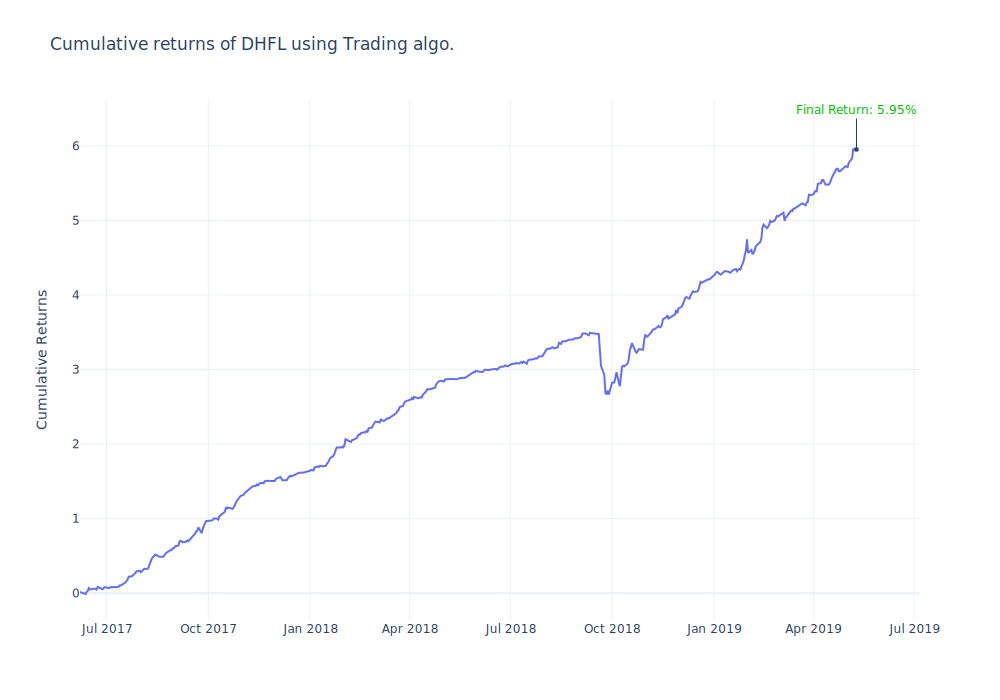

In [35]:
pred_action = clf.predict(X)
cumsum = (pct_change * pred_action).cumsum()
cumsum = pd.DataFrame(cumsum)
cumsum = cumsum.rename({'Perc_Close': 'Cumulative Returns'}, axis = 1)
import plotly.express as px
fig = px.line(cumsum,
              x = cumsum.index, 
              y="Cumulative Returns", 
              title='Cumulative returns of DHFL using Trading algo.', template = 'plotly_white')
fig.update_layout(dict(xaxis_title=''))
fig.update_layout(
    showlegend=False,
    annotations=[
        dict(
            x=cumsum.index[-1],
            y=cumsum['Cumulative Returns'].iloc[-1],
            xref="x",
            yref="y",
            text=f"Final Return: {cumsum['Cumulative Returns'].iloc[-1]:.3}%",
            font = dict(color = 'rgb(0, 190, 0)'),
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=-40
        )
    ]
)
fig.show('svg', width = 1000, height = 700)